In [1]:
import glob

import numpy
import torch
import PIL.Image
import torchvision.tv_tensors
import torchvision.transforms.v2

transforms = torchvision.transforms.v2.Compose([
    torchvision.transforms.v2.CenterCrop((224, 224)),
    torchvision.transforms.v2.Resize((64, 64)),
    torchvision.transforms.v2.ToDtype(torch.float32, scale = True)
])
def transforms_wrapper(image, mask):
    image = torchvision.tv_tensors.Image(image)
    mask = torchvision.tv_tensors.Mask(mask)
    return transforms(image, mask)

def load_dataset(path):
    images, masks = [], []
    for filename in glob.glob(f"{path}/image/*"):
        image, mask = transforms_wrapper(
            PIL.Image.open(filename),
            PIL.Image.open(filename.replace("image", "mask").replace("jpg", "png"))
        )
        images.append(image.permute((1, 2, 0)).numpy())
        masks.append(mask.squeeze().numpy())
    return numpy.array(images), numpy.array(masks)

train_images, train_masks = load_dataset("midv500p/train")
test_images, test_masks = load_dataset("midv500p/val")

train_images.shape, train_masks.shape, test_images.shape, test_masks.shape

((553, 64, 64, 3), (553, 64, 64), (62, 64, 64, 3), (62, 64, 64))

In [2]:
import cvtda.topology

extractor = cvtda.topology.FeatureExtractor(n_jobs = 1, only_get_from_dump = False, return_diagrams = False)
extractor = extractor.fit(train_images, "1/train")
train_features = extractor.transform(train_images, "1/train")
test_features = extractor.transform(test_images, "1/test")

train_features.shape, test_features.shape

Calculating inverted images
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 20480.80it/s]

GreyscaleExtractor: processing 1/train/greyscale/gray, do_fit = True
Got the result from ./1/train/greyscale/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: fitting complete
Got the result from ./1/train/greyscale/gray/features.npy
GreyscaleExtractor: processing 1/train/greyscale/gray, do_fit = False
Got the result from ./1/train/greyscale/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/greyscale/gray/features.npy
GreyscaleExtractor: processing 1/train/greyscale/red, do_fit = True
Got the result from ./1/train/greyscale/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/greyscale/red/features.npy
GreyscaleExtractor: processing 1/train/greyscale/red, do_fit = False
Got the result from ./1/train/greyscale/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/greyscale/red/features.npy
GreyscaleExtractor: processing 1/train/greyscale/green, do_fit = True
Got the result from ./1/train/greyscale/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 39510.94it/s]


GreyscaleExtractor: processing 1/train/greyscale/gray, do_fit = False
Got the result from ./1/train/greyscale/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/greyscale/gray/features.npy
GreyscaleExtractor: processing 1/train/greyscale/red, do_fit = False
Got the result from ./1/train/greyscale/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/greyscale/red/features.npy
GreyscaleExtractor: processing 1/train/greyscale/green, do_fit = False
Got the result from ./1/train/greyscale/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/greyscale/green/features.npy
GreyscaleExtractor: processing 1/train/greyscale/blue, do_fit = False
Got the result from ./1/train/greyscale/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/greyscale/blue/features.npy
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50280.73it/s]

GreyscaleExtractor: processing 1/train/inverted_greyscale/gray, do_fit = True
Got the result from ./1/train/inverted_greyscale/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: fitting complete
Got the result from ./1/train/inverted_greyscale/gray/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/gray, do_fit = False
Got the result from ./1/train/inverted_greyscale/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/inverted_greyscale/gray/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/red, do_fit = True
Got the result from ./1/train/inverted_greyscale/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/inverted_greyscale/red/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/red, do_fit = False
Got the result from ./1/train/inverted_greyscale/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/inverted_greyscale/red/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/green, do_fit = True
Got the result from ./1/tra

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46082.10it/s]


GreyscaleExtractor: processing 1/train/inverted_greyscale/gray, do_fit = False
Got the result from ./1/train/inverted_greyscale/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/inverted_greyscale/gray/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/red, do_fit = False
Got the result from ./1/train/inverted_greyscale/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/inverted_greyscale/red/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/green, do_fit = False
Got the result from ./1/train/inverted_greyscale/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/inverted_greyscale/green/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/blue, do_fit = False
Got the result from ./1/train/inverted_greyscale/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/inverted_greyscale/bl

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 36866.99it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/gray, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/red, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/red/features.np

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46058.30it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/gray, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/red, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/green, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50316.73it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/gray, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/red, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/red/features.npy
Filtra

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42536.08it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/gray, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/red, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/green, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/HeightFi

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46089.42it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/gray, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/red, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/green, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/HeightFi

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50281.82it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/gray, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/red, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/green, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42540.76it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/gray, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/gray/diagrams.npy


Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/red, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46091.25it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/gray, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/red, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/red/features.npy
FiltrationExtracto

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46083.01it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/red, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltra

DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/green, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/green, do_fit = Fals

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46080.26it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/red, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/green, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltrati

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46084.84it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/red, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/red, do_fit = False, f

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 44600.52it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/red, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltra

DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/green, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/green, do_fit = Fals

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50276.37it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/red, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/red/features.npy
FiltrationEx

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46080.26it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/red, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/red, do_fit = False, f

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50280.73it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/red, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltra

DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/green, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/green, do_fit = Fals

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50279.64it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/red, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/red/features.npy
FiltrationEx

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46092.17it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/red, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/green, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltrati

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50276.37it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/red, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/red, do_fit = False, f

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50274.19it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/red, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltra

Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/green, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/green, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/green/features.npy
Fi

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 55297.42it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/red, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/green, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltrati

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46084.84it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/red, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/red, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/red/features.npy
FiltrationEx

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46082.10it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/red, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/red/features.npy
FiltrationEx

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42548.57it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/red, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/red, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/red/features.npy
FiltrationEx

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50095.03it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/red, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/red, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/green, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/2/RadialFiltrati

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46083.93it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/gray, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)


Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/red, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50069.08it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/gray, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)


Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/red, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/red/features.npy
FiltrationExtracto

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50266.57it/s]


FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/gray, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/red, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/Hei

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46271.47it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/gray, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/red, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/red, do_fit = Fa

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46077.52it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/gray, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/red, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)


Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/green, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/HeightFi

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 55029.78it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/gray, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)


Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/red, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/red/features.npy
FiltrationExtracto

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50287.27it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/gray, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/gray/features.npy


FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/red, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/green, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightF

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46083.01it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/gray, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.


Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/red, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/green, do_fit = True, filtration = HeightFiltration(direction=array

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46087.59it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/red, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/red/features.npy
FiltrationEx

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46253.94it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/red, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/red/features.npy
FiltrationEx

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46078.43it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/red, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/red, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/green, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltrati

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46089.42it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/red, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/red, do_fit = False, f

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46067.45it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/red, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/green, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltrati

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 45933.34it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/red, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/green, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltrati

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50274.19it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/red, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/green, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltrati

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46271.47it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/red, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/red/features.npy
FiltrationEx

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50285.09it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/red, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/red/features.npy
FiltrationEx

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50293.81it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/red, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/red, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/red/features.npy
FiltrationEx

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46089.42it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/red, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/red, do_fit = False, f

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 47162.47it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/red, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/green, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltrati

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50097.20it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/red, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/red, do_fit = False, f

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50080.97it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/red, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltra

DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/green, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/green, do_fit = Fals

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50064.76it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/red, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/red, do_fit = False, f

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50276.37it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/red, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/4/RadialFiltrat

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50078.81it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/gray, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)


Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/red, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/red/features.np

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50079.89it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/gray, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/red, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)


Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/green, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50080.97it/s]


FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/gray, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/red, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/Hei

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50092.87it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/gray, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)


Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/red, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/Height

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50284.00it/s]


FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/gray, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/red, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/Hei

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 55306.65it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/gray, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)


Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/red, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/HeightFiltrartion_

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50237.17it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/gray, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/gray/diagrams.npy


Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/red, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50070.16it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/gray, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)


Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/red, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/red/features.npy
FiltrationExtracto

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50090.71it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/red, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/green, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltrati

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50032.36it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/red, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltra

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46067.45it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/red, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltra

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42515.03it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/red, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/green, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltrati

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46076.60it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/red, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltra

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50286.18it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/red, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/green, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltrati

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 39360.75it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/red, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltra

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50269.83it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/red, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltra

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46243.80it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/red, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltra

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50280.73it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/red, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltra

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50090.71it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/red, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltra

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46078.43it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/red, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/green, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltrati

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 39498.15it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/red, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltra

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 55080.74it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/red, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltra

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50060.43it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/red, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltra

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50092.87it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/red, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltra

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46067.45it/s]


FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/green/d

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50443.66it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/green/diagrams.npy
Applying S

Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/blue/features.npy
Applying filtration 3/72: 2/HeightFiltrartion_1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50238.26it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/green/diagrams.

Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/blue/features.npy
Applying filtration 4/72: 2/HeightFiltrartion_-1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46080.26it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/green/diagrams.

Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/blue/features.npy
Applying filtration 5/72: 2/HeightFiltrartion_0_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46083.93it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/blue/features.npy
Applying filtration 6/72: 2/HeightFiltrartion_0_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50268.74it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/green, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/blue/features.npy
Applying filtration 7/72: 2/HeightFiltrartion_-1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50275.28it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/blue/features.npy
Applying filtration 8/72: 2/HeightFiltrartion_1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46089.42it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/blue/features.npy
Applying filtration 9/72: 2/RadialFiltration_12_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50358.24it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/green, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/blue/features.npy
Applying filtration 10/72: 2/RadialFiltration_12_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50296.00it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/green, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/blue/features.npy
Applying filtration 11/72: 2/RadialFiltration_12_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42540.76it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/red, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/green, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/blue/features.npy
Applying filtration 12/72: 2/RadialFiltration_12_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42547.79it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/green, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/blue/features.npy
Applying filtration 13/72: 2/RadialFiltration_25_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 39499.50it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/green, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/blue/features.npy
Applying filtration 14/72: 2/RadialFiltration_25_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50267.65it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/green, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/blue/features.npy
Applying filtration 15/72: 2/RadialFiltration_25_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50280.73it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/green, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/blue/features.npy
Applying filtration 16/72: 2/RadialFiltration_25_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50275.28it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/green, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/blue/features.npy
Applying filtration 17/72: 2/RadialFiltration_38_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42719.41it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/green, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/blue/features.npy
Applying filtration 18/72: 2/RadialFiltration_38_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46097.66it/s]


FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/red, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/green, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/green/diagrams.npy
Apply

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50276.37it/s]


FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/red, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/green, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/green/diagrams.npy
Apply

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50279.64it/s]


FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/green, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/green/diagrams.npy
Apply

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 39495.46it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/red, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/green, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/blue/features.npy
Applying filtration 22/72: 2/RadialFiltration_51_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46088.51it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/green, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/blue/features.npy
Applying filtration 23/72: 2/RadialFiltration_51_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42518.15it/s]


FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/red, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/green, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/green/diagrams.npy
Apply

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50084.22it/s]


FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/red, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/green, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/green/diagrams.npy
Apply

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50273.10it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/green/d

Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/blue/features.npy
Applying filtration 26/72: 4/HeightFiltrartion_1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42543.11it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/green/diagrams.npy
Applying S

Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/blue/features.npy
Applying filtration 27/72: 4/HeightFiltrartion_1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46092.17it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/green/diagrams.

Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/blue/features.npy
Applying filtration 28/72: 4/HeightFiltrartion_-1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 30722.82it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/green/diagrams.

Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/blue/features.npy
Applying filtration 29/72: 4/HeightFiltrartion_0_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 45934.25it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/green/diagrams.

Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/blue/features.npy
Applying filtration 30/72: 4/HeightFiltrartion_0_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42557.16it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/green, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/green/diagrams.npy
Applying S

Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/blue/features.npy
Applying filtration 31/72: 4/HeightFiltrartion_-1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50273.10it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/green/diagrams.

Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/blue/features.npy
Applying filtration 32/72: 4/HeightFiltrartion_1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 36865.82it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/green/diagrams.npy
Applying S

Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/blue/features.npy
Applying filtration 33/72: 4/RadialFiltration_12_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50268.74it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/green, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/green/diagrams.npy
Apply

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50045.31it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/green, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/green/diagrams.npy
Apply

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50096.11it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/red, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/green, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/blue/features.npy
Applying filtration 36/72: 4/RadialFiltration_12_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50059.35it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/green, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/blue/features.npy
Applying filtration 37/72: 4/RadialFiltration_25_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 32518.54it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/green, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/blue/features.npy
Applying filtration 38/72: 4/RadialFiltration_25_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 43845.11it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/green, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/blue/features.npy
Applying filtration 39/72: 4/RadialFiltration_25_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46089.42it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/green, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/blue/features.npy
Applying filtration 40/72: 4/RadialFiltration_25_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46083.01it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/green, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/blue/features.npy
Applying filtration 41/72: 4/RadialFiltration_38_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42530.62it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/green, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/blue/features.npy
Applying filtration 42/72: 4/RadialFiltration_38_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46080.26it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/red, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/green, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/green/diagrams.npy
Apply

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50470.01it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/red, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/green, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/green/diagrams.npy
Apply

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42590.76it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/green, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/blue/features.npy
Applying filtration 45/72: 4/RadialFiltration_51_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 39496.81it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/red, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/green, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/blue/features.npy
Applying filtration 46/72: 4/RadialFiltration_51_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46083.01it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/green, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/blue/features.npy
Applying filtration 47/72: 4/RadialFiltration_51_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 36861.14it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/red, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/green, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/blue/features.npy
Applying filtration 48/72: 4/RadialFiltration_51_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46086.67it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/red, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/green, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/blue/features.npy
Applying filtration 49/72: 6/HeightFiltrartion_-1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46083.01it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/green/d

Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/blue/features.npy
Applying filtration 50/72: 6/HeightFiltrartion_1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42542.33it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/green/diagrams.npy
Applying S

Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/blue/features.npy
Applying filtration 51/72: 6/HeightFiltrartion_1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42539.98it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/green/diagrams.

Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/blue/features.npy
Applying filtration 52/72: 6/HeightFiltrartion_-1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 39488.74it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/green/diagrams.

Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/blue/features.npy
Applying filtration 53/72: 6/HeightFiltrartion_0_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50270.92it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/green/diagrams.

Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/blue/features.npy
Applying filtration 54/72: 6/HeightFiltrartion_0_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 32373.76it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/green, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/green/diagrams.npy
Applying S

Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/blue/features.npy
Applying filtration 55/72: 6/HeightFiltrartion_-1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42542.33it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/green/diagrams.

Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/blue/features.npy
Applying filtration 56/72: 6/HeightFiltrartion_1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42544.67it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/green/diagrams.npy
Applying S

Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/blue/features.npy
Applying filtration 57/72: 6/RadialFiltration_12_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50284.00it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/green, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/blue/features.npy
Applying filtration 58/72: 6/RadialFiltration_12_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46088.51it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/green, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/blue/features.npy
Applying filtration 59/72: 6/RadialFiltration_12_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 39502.86it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/red, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/green, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/blue/features.npy
Applying filtration 60/72: 6/RadialFiltration_12_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 29102.26it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/green, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/green/diagrams.npy
Apply

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46268.70it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/green, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/blue/features.npy
Applying filtration 62/72: 6/RadialFiltration_25_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46094.92it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/green, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/blue/features.npy
Applying filtration 63/72: 6/RadialFiltration_25_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46096.75it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/green, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/blue/features.npy
Applying filtration 64/72: 6/RadialFiltration_25_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 55310.60it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/green, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/blue/features.npy
Applying filtration 65/72: 6/RadialFiltration_38_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42498.67it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/green, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/blue/features.npy
Applying filtration 66/72: 6/RadialFiltration_38_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46083.93it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/red, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/green, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/blue/features.npy
Applying filtration 67/72: 6/RadialFiltration_38_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46079.35it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/red, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/green, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/blue/features.npy
Applying filtration 68/72: 6/RadialFiltration_38_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50086.38it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/green, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/blue/features.npy
Applying filtration 69/72: 6/RadialFiltration_51_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 45909.70it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/red, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/green, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/blue/features.npy
Applying filtration 70/72: 6/RadialFiltration_51_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50245.88it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/green, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/blue/features.npy
Applying filtration 71/72: 6/RadialFiltration_51_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42522.83it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/red, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/green, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/blue/features.npy
Applying filtration 72/72: 6/RadialFiltration_51_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46082.10it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/red, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/green, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/blue/features.npy
RGB images received. Transforming to grayscale.
Got the result from ./1/train/geometry/rgb/features.npy


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50281.82it/s]


Got the result from ./1/train/geometry/gray/features.npy
Got the result from ./1/train/geometry/gray/features.npy
Got the result from ./1/train/geometry/red/features.npy
Got the result from ./1/train/geometry/red/features.npy
Got the result from ./1/train/geometry/green/features.npy
Got the result from ./1/train/geometry/green/features.npy
Got the result from ./1/train/geometry/blue/features.npy
Got the result from ./1/train/geometry/blue/features.npy
RGB images received. Transforming to grayscale.
Got the result from ./1/train/geometry/rgb/features.npy


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46086.67it/s]

Got the result from ./1/train/geometry/gray/features.npy
Got the result from ./1/train/geometry/red/features.npy
Got the result from ./1/train/geometry/green/features.npy
Got the result from ./1/train/geometry/blue/features.npy


Applying StandardScaler.
Calculating inverted images
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 55311.92it/s]


GreyscaleExtractor: processing 1/train/greyscale/gray, do_fit = False
Got the result from ./1/train/greyscale/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/greyscale/gray/features.npy
GreyscaleExtractor: processing 1/train/greyscale/red, do_fit = False
Got the result from ./1/train/greyscale/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/greyscale/red/features.npy
GreyscaleExtractor: processing 1/train/greyscale/green, do_fit = False
Got the result from ./1/train/greyscale/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/greyscale/green/features.npy
GreyscaleExtractor: processing 1/train/greyscale/blue, do_fit = False
Got the result from ./1/train/greyscale/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/greyscale/blue/features.npy
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50278.55it/s]


GreyscaleExtractor: processing 1/train/inverted_greyscale/gray, do_fit = False
Got the result from ./1/train/inverted_greyscale/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/inverted_greyscale/gray/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/red, do_fit = False
Got the result from ./1/train/inverted_greyscale/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/inverted_greyscale/red/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/green, do_fit = False
Got the result from ./1/train/inverted_greyscale/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/inverted_greyscale/green/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/blue, do_fit = False
Got the result from ./1/train/inverted_greyscale/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/inverted_greyscale/bl

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50057.19it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/green/features.npy
FiltrationExtractor: proces

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50252.41it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/blue/features.npy
Applying filtration 3/72: 2/HeightFiltrartion_1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50270.92it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/green/diagrams.


Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/blue/features.npy
Applying filtration 4/72: 2/HeightFiltrartion_-1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50082.05it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/blue/features.npy
Applying filtration 5/72: 2/HeightFiltrartion_0_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50083.13it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/blue/features.npy
Applying filtration 6/72: 2/HeightFiltrartion_0_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50273.10it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/green, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/green/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/blue/features.npy
Applying filtration 7/72: 2/HeightFiltrartion_-1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50277.46it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/blue/features.npy
Applying filtration 8/72: 2/HeightFiltrartion_1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50272.01it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/blue/features.npy
Applying filtration 9/72: 2/RadialFiltration_12_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 55091.21it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/green, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/blue/features.npy
Applying filtration 10/72: 2/RadialFiltration_12_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 36864.07it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/green, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/blue/features.npy
Applying filtration 11/72: 2/RadialFiltration_12_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46087.59it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/red, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/green, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/green/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/blue/features.npy
Applying filtration 12/72: 2/RadialFiltration_12_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50274.19it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/green, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/blue/features.npy
Applying filtration 13/72: 2/RadialFiltration_25_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46083.01it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/green, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/blue/features.npy
Applying filtration 14/72: 2/RadialFiltration_25_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50281.82it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/green, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/blue/features.npy
Applying filtration 15/72: 2/RadialFiltration_25_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46089.42it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/green, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/blue/features.npy
Applying filtration 16/72: 2/RadialFiltration_25_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50276.37it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/green, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/blue/features.npy
Applying filtration 17/72: 2/RadialFiltration_38_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 39497.48it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/green, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/blue/features.npy
Applying filtration 18/72: 2/RadialFiltration_38_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50276.37it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/red, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/green, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/blue/features.npy
Applying filtration 19/72: 2/RadialFiltration_38_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46081.18it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/red, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/green, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/blue/features.npy
Applying filtration 20/72: 2/RadialFiltration_38_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46086.67it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/green, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/blue/features.npy
Applying filtration 21/72: 2/RadialFiltration_51_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 29104.82it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/red, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/green, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/blue/features.npy
Applying filtration 22/72: 2/RadialFiltration_51_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50453.54it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/green, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/blue/features.npy
Applying filtration 23/72: 2/RadialFiltration_51_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50286.18it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/red, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/green, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/blue/features.npy
Applying filtration 24/72: 2/RadialFiltration_51_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46092.17it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/red, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/green, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/blue/features.npy
Applying filtration 25/72: 4/HeightFiltrartion_-1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46081.18it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/green/d

Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/blue/features.npy
Applying filtration 26/72: 4/HeightFiltrartion_1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42537.64it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/green/diagrams.npy
Applying S

Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/blue/features.npy
Applying filtration 27/72: 4/HeightFiltrartion_1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46084.84it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/green/diagrams.

Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/blue/features.npy
Applying filtration 28/72: 4/HeightFiltrartion_-1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46090.34it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/green/diagrams.

Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/blue/features.npy
Applying filtration 29/72: 4/HeightFiltrartion_0_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 55311.92it/s]


FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/green/diagrams.

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50257.85it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/green, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/green/diagrams.npy
Applying S

Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/blue/features.npy
Applying filtration 31/72: 4/HeightFiltrartion_-1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50279.64it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/green/diagrams.

Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/blue/features.npy
Applying filtration 32/72: 4/HeightFiltrartion_1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46086.67it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/green/diagrams.npy
Applying S

Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/blue/features.npy
Applying filtration 33/72: 4/RadialFiltration_12_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46082.10it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/green, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/blue/features.npy
Applying filtration 34/72: 4/RadialFiltration_12_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46298.26it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/green, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/blue/features.npy
Applying filtration 35/72: 4/RadialFiltration_12_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46094.00it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/red, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/green, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/blue/features.npy
Applying filtration 36/72: 4/RadialFiltration_12_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46084.84it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/green, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/blue/features.npy
Applying filtration 37/72: 4/RadialFiltration_25_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 34557.80it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/green, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/blue/features.npy
Applying filtration 38/72: 4/RadialFiltration_25_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46221.68it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/green, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/green/diagrams.npy
Apply

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50464.52it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/green, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/green/diagrams.npy
Apply

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 55065.05it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/green, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/green/diagrams.npy
Apply

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 55058.52it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/green, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/green/diagrams.npy
Apply

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50279.64it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/red, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/green, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/green/diagrams.npy
Apply

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 55309.28it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/red, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/green, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/green/diagrams.npy
Apply

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46068.37it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/green, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/blue/features.npy
Applying filtration 45/72: 4/RadialFiltration_51_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50216.50it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/red, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/green, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/blue/features.npy
Applying filtration 46/72: 4/RadialFiltration_51_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 55296.10it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/green, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/blue/features.npy
Applying filtration 47/72: 4/RadialFiltration_51_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50277.46it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/red, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/green, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/blue/features.npy
Applying filtration 48/72: 4/RadialFiltration_51_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 32524.93it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/red, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/green, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/blue/features.npy
Applying filtration 49/72: 6/HeightFiltrartion_-1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50253.50it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/green/d

Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/blue/features.npy
Applying filtration 50/72: 6/HeightFiltrartion_1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50272.01it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/green/diagrams.npy
Applying S

Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/blue/features.npy
Applying filtration 51/72: 6/HeightFiltrartion_1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50267.65it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/green/diagrams.

Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/blue/features.npy
Applying filtration 52/72: 6/HeightFiltrartion_-1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46078.43it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/green/diagrams.

Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/blue/features.npy
Applying filtration 53/72: 6/HeightFiltrartion_0_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 30720.79it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/green/diagrams.

Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/blue/features.npy
Applying filtration 54/72: 6/HeightFiltrartion_0_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50280.73it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/green, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/green/diagrams.npy
Applying S

Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/blue/features.npy
Applying filtration 55/72: 6/HeightFiltrartion_-1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50281.82it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/green/diagrams.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50075.57it/s]


FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/green/diagrams.npy
Applying S

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46081.18it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/green, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/blue/features.npy
Applying filtration 58/72: 6/RadialFiltration_12_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50277.46it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/green, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/blue/features.npy
Applying filtration 59/72: 6/RadialFiltration_12_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50241.52it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/red, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/green, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/blue/features.npy
Applying filtration 60/72: 6/RadialFiltration_12_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46092.17it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/green, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/blue/features.npy
Applying filtration 61/72: 6/RadialFiltration_25_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46085.76it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/green, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/blue/features.npy
Applying filtration 62/72: 6/RadialFiltration_25_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 25136.28it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/green, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/blue/features.npy
Applying filtration 63/72: 6/RadialFiltration_25_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50072.32it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/green, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/blue/features.npy
Applying filtration 64/72: 6/RadialFiltration_25_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46063.79it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/green, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/blue/features.npy
Applying filtration 65/72: 6/RadialFiltration_38_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50276.37it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/green, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/blue/features.npy
Applying filtration 66/72: 6/RadialFiltration_38_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46094.00it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/red, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/green, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/blue/features.npy
Applying filtration 67/72: 6/RadialFiltration_38_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46094.92it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/red, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/green, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/blue/features.npy
Applying filtration 68/72: 6/RadialFiltration_38_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46071.11it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/green, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/blue/features.npy
Applying filtration 69/72: 6/RadialFiltration_51_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50072.32it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/red, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/green, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/blue/features.npy
Applying filtration 70/72: 6/RadialFiltration_51_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50273.10it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/green, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/blue/features.npy
Applying filtration 71/72: 6/RadialFiltration_51_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42545.45it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/red, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/green, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/blue/features.npy
Applying filtration 72/72: 6/RadialFiltration_51_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50272.01it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/red, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/green, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/blue/features.npy
RGB images received. Transforming to grayscale.
Got the result from ./1/train/geometry/rgb/features.npy


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 49829.21it/s]

Got the result from ./1/train/geometry/gray/features.npy
Got the result from ./1/train/geometry/red/features.npy
Got the result from ./1/train/geometry/green/features.npy
Got the result from ./1/train/geometry/blue/features.npy
Applying StandardScaler.


Calculating inverted images
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 62137.84it/s]


GreyscaleExtractor: processing 1/test/greyscale/gray, do_fit = False
Got the result from ./1/test/greyscale/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/greyscale/gray/features.npy
GreyscaleExtractor: processing 1/test/greyscale/red, do_fit = False
Got the result from ./1/test/greyscale/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/greyscale/red/features.npy
GreyscaleExtractor: processing 1/test/greyscale/green, do_fit = False
Got the result from ./1/test/greyscale/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/greyscale/green/features.npy
GreyscaleExtractor: processing 1/test/greyscale/blue, do_fit = False
Got the result from ./1/test/greyscale/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/greyscale/blue/features.npy
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31106.08it/s]


GreyscaleExtractor: processing 1/test/inverted_greyscale/gray, do_fit = False
Got the result from ./1/test/inverted_greyscale/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/inverted_greyscale/gray/features.npy
GreyscaleExtractor: processing 1/test/inverted_greyscale/red, do_fit = False
Got the result from ./1/test/inverted_greyscale/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/inverted_greyscale/red/features.npy
GreyscaleExtractor: processing 1/test/inverted_greyscale/green, do_fit = False
Got the result from ./1/test/inverted_greyscale/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/inverted_greyscale/green/features.npy
GreyscaleExtractor: processing 1/test/inverted_greyscale/blue, do_fit = False
Got the result from ./1/test/inverted_greyscale/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/inverted_greyscale/blue/features.

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30994.86it/s]


FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_-1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_-1_-1/green/diagrams.

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30414.84it/s]

FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_1_1/red/features.npy


FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_1_1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_1_1/blue/features.npy
Applying filtration 3/72: 2/HeightFiltrartion_1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31013.34it/s]


FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_1_-1/green/diagrams.npy
Appl

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 20668.16it/s]


FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_-1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_-1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_-1_1/green/diagrams.npy
Appl

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 62019.28it/s]

FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_0_-1/red/features.npy


FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_0_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_0_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_0_-1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_0_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_0_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_0_-1/blue/features.npy
Applying filtration 6/72: 2/HeightFiltrartion_0_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30980.09it/s]


FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_0_1/green, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_0_1/green/diagrams.npy
Applying Scaler to

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 61989.71it/s]

FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_-1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_-1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_-1_0/green/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_-1_0/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_-1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_-1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_-1_0/blue/features.npy
Applying filtration 8/72: 2/HeightFiltrartion_1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 62078.50it/s]

FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/test/filtrations/2/HeightFiltrartion_1_0/green/diagrams.npy
Applying Scaler to

Got the result from ./1/test/filtrations/2/HeightFiltrartion_1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/HeightFiltrartion_1_0/blue/features.npy
Applying filtration 9/72: 2/RadialFiltration_12_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 62019.28it/s]

FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_12/green, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_12_12/green/diagrams.npy
Applying Scal

FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_12/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_12_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_12_12/blue/features.npy
Applying filtration 10/72: 2/RadialFiltration_12_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31002.25it/s]

FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_25/green, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_12_25/green/diagrams.npy
Applying Scal

Got the result from ./1/test/filtrations/2/RadialFiltration_12_25/blue/features.npy
Applying filtration 11/72: 2/RadialFiltration_12_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 62004.49it/s]

FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_38/red, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_38/green, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)


Got the result from ./1/test/filtrations/2/RadialFiltration_12_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_12_38/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_38/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_12_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_12_38/blue/features.npy
Applying filtration 12/72: 2/RadialFiltration_12_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30998.55it/s]


FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_51/green, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_12_51/green/diagrams.npy
Applying Scal

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 61960.17it/s]

FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_12/green, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_25_12/green/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_25_12/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_12/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_25_12/blue/features.npy
Applying filtration 14/72: 2/RadialFiltration_25_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31002.25it/s]

FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_25/green, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)


Got the result from ./1/test/filtrations/2/RadialFiltration_25_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_25_25/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_25/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_25_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_25_25/blue/features.npy
Applying filtration 15/72: 2/RadialFiltration_25_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 20666.52it/s]

FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_38/green, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)


Got the result from ./1/test/filtrations/2/RadialFiltration_25_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_25_38/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_38/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_25_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_25_38/blue/features.npy
Applying filtration 16/72: 2/RadialFiltration_25_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31582.08it/s]

FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_25_51/red/features.npy


FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_51/green, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_25_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_25_51/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_51/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_25_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_25_51/blue/features.npy
Applying filtration 17/72: 2/RadialFiltration_38_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31009.64it/s]

FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_12/green, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_38_12/green/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_38_12/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_12/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_38_12/blue/features.npy
Applying filtration 18/72: 2/RadialFiltration_38_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 61989.71it/s]

FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_25/red, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_25/green, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_38_25/green/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_38_25/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_25/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_38_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_38_25/blue/features.npy
Applying filtration 19/72: 2/RadialFiltration_38_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30983.78it/s]


FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_38/red, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_38/green, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_38_38/green/diagrams.npy
Applying Scal

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 62241.95it/s]


FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_51/green, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_38_51/green/diagrams.npy
Applying Scal

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31083.77it/s]


FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_12/red, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_12/green, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_51_12/green/diagrams.npy
Applying Scal

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 61974.94it/s]

FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_25/green, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_51_25/green/diagrams.npy
Applying Scal

Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_51_25/blue/features.npy
Applying filtration 23/72: 2/RadialFiltration_51_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30998.55it/s]

FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_38/red, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_38/green, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_51_38/green/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_51_38/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_38/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_51_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_51_38/blue/features.npy
Applying filtration 24/72: 2/RadialFiltration_51_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 15502.05it/s]


FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_51/red, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/2/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_51/green, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/2/RadialFiltration_51_51/green/diagrams.npy
Applying Scal

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31467.43it/s]

FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_-1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)


Got the result from ./1/test/filtrations/4/HeightFiltrartion_-1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/HeightFiltrartion_-1_-1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_-1_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_-1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/HeightFiltrartion_-1_-1/blue/features.npy
Applying filtration 26/72: 4/HeightFiltrartion_1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30400.61it/s]


FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_1_1/green/diagrams.npy
Applying Scaler to

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 62004.49it/s]


FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_1_-1/green/diagrams.npy
Appl

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 15490.04it/s]

FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_-1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_-1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_-1_1/green/diagrams.npy
Appl

Got the result from ./1/test/filtrations/4/HeightFiltrartion_-1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/HeightFiltrartion_-1_1/blue/features.npy
Applying filtration 29/72: 4/HeightFiltrartion_0_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31330.95it/s]


FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_0_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_0_-1/green/diagrams.npy
Appl

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31639.72it/s]


FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_0_1/green, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_0_1/green/diagrams.npy
Applying Scaler to

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 62019.28it/s]


FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_-1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_-1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_-1_0/green/diagrams.npy
Appl

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31020.74it/s]

FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)


Got the result from ./1/test/filtrations/4/HeightFiltrartion_1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/HeightFiltrartion_1_0/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/test/filtrations/4/HeightFiltrartion_1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/HeightFiltrartion_1_0/blue/features.npy
Applying filtration 33/72: 4/RadialFiltration_12_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 61989.71it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_12/green, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_12_12/green/diagrams.npy
Applying Scal

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 62063.69it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_25/green, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_12_25/green/diagrams.npy
Applying Scal

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31017.04it/s]

FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_38/red, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_38/green, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)


Got the result from ./1/test/filtrations/4/RadialFiltration_12_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_12_38/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_38/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_12_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_12_38/blue/features.npy
Applying filtration 36/72: 4/RadialFiltration_12_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31005.94it/s]

FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_12_51/red/features.npy


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_51/green, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_12_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_12_51/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_51/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_12_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_12_51/blue/features.npy
Applying filtration 37/72: 4/RadialFiltration_25_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31732.38it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_12/green, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_25_12/green/diagrams.npy
Applying Scal

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31266.90it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_25/green, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_25_25/green/diagrams.npy
Applying Scal

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 61930.66it/s]

FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_38/green, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_25_38/green/diagrams.npy
Applying Scal

FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_38/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_25_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_25_38/blue/features.npy
Applying filtration 40/72: 4/RadialFiltration_25_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31031.84it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_51/green, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_25_51/green/diagrams.npy
Applying Scal

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 61930.66it/s]

FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_12/green, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)


Got the result from ./1/test/filtrations/4/RadialFiltration_38_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_38_12/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_12/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_38_12/blue/features.npy
Applying filtration 42/72: 4/RadialFiltration_38_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31002.25it/s]

FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_25/red, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.


Got the result from ./1/test/filtrations/4/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_25/green, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_38_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_38_25/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_25/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_38_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_38_25/blue/features.npy
Applying filtration 43/72: 4/RadialFiltration_38_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30935.86it/s]

FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_38/red, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_38/green, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_38_38/green/diagrams.npy
Applying Scal

FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_38/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_38_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_38_38/blue/features.npy
Applying filtration 44/72: 4/RadialFiltration_38_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31013.34it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_51/green, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_38_51/green/diagrams.npy
Applying Scal

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30407.72it/s]

FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_12/red, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_12/green, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_51_12/green/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_51_12/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_12/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_51_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_51_12/blue/features.npy
Applying filtration 46/72: 4/RadialFiltration_51_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30987.47it/s]

FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_25/green, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_51_25/green/diagrams.npy
Applying Scal

Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_51_25/blue/features.npy
Applying filtration 47/72: 4/RadialFiltration_51_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 15490.04it/s]

FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_38/red, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_51_38/red/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_38/green, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_51_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_51_38/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_38/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_51_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_51_38/blue/features.npy
Applying filtration 48/72: 4/RadialFiltration_51_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 62034.08it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_51/red, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/4/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_51/green, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/4/RadialFiltration_51_51/green/diagrams.npy
Applying Scal

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30206.39it/s]


FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_-1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_-1_-1/green/diagrams.

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30983.78it/s]


FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_1_1/green/diagrams.npy
Applying Scaler to

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30957.96it/s]


FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_1_-1/green/diagrams.npy
Appl

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31039.25it/s]


FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_-1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_-1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_-1_1/green/diagrams.npy
Appl

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 61930.66it/s]

FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_0_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)


Got the result from ./1/test/filtrations/6/HeightFiltrartion_0_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_0_-1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_0_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_0_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_0_-1/blue/features.npy
Applying filtration 54/72: 6/HeightFiltrartion_0_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30980.09it/s]

FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_0_1/green, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)


Got the result from ./1/test/filtrations/6/HeightFiltrartion_0_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_0_1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_0_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_0_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_0_1/blue/features.npy
Applying filtration 55/72: 6/HeightFiltrartion_-1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31005.94it/s]

FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_-1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_-1_0/red/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_-1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_-1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_-1_0/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_-1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_-1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_-1_0/blue/features.npy
Applying filtration 56/72: 6/HeightFiltrartion_1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31017.04it/s]

FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.


Got the result from ./1/test/filtrations/6/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_1_0/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/test/filtrations/6/HeightFiltrartion_1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/HeightFiltrartion_1_0/blue/features.npy
Applying filtration 57/72: 6/RadialFiltration_12_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30994.86it/s]

FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_12/green, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_12_12/green/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_12_12/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_12/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_12_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_12_12/blue/features.npy
Applying filtration 58/72: 6/RadialFiltration_12_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 15507.59it/s]

FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_12_25/red/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_25/green, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_12_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_12_25/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_25/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_12_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_12_25/blue/features.npy
Applying filtration 59/72: 6/RadialFiltration_12_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30932.18it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_38/red, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_38/green, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_12_38/green/diagrams.npy
Applying Scal

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31020.74it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_51/green, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_12_51/green/diagrams.npy
Applying Scal

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31028.14it/s]

FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_25_12/red/features.npy


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_12/green, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_25_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_25_12/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_12/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_25_12/blue/features.npy
Applying filtration 62/72: 6/RadialFiltration_25_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 61945.41it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_25/green, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_25_25/green/diagrams.npy
Applying Scal

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31009.64it/s]

FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_25_38/red/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_38/green, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_25_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_25_38/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_38/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_25_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_25_38/blue/features.npy
Applying filtration 64/72: 6/RadialFiltration_25_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30983.78it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_51/green, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_25_51/green/diagrams.npy
Applying Scal

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30987.47it/s]

FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_38_12/red/features.npy


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_12/green, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_38_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_38_12/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_12/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_38_12/blue/features.npy
Applying filtration 66/72: 6/RadialFiltration_38_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31039.25it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_25/red, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_25/green, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_38_25/green/diagrams.npy
Applying Scal

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30980.09it/s]

FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_38/red, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_38/green, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_38_38/green/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_38_38/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_38/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_38_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_38_38/blue/features.npy
Applying filtration 68/72: 6/RadialFiltration_38_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30983.78it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_51/green, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_38_51/green/diagrams.npy
Applying Scal

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 21039.39it/s]

FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_12/red, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_12/green, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_51_12/green/diagrams.npy
Applying Scal

Applying filtration 70/72: 6/RadialFiltration_51_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31013.34it/s]

FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_25/green, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_51_25/green/diagrams.npy
Applying Scal

Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_51_25/blue/features.npy
Applying filtration 71/72: 6/RadialFiltration_51_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31005.94it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_38/red, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_38/green, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_51_38/green/diagrams.npy
Applying Scal

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 61989.71it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_51/red, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/test/filtrations/6/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_51/green, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/test/filtrations/6/RadialFiltration_51_51/green/diagrams.npy
Applying Scal

rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30998.55it/s]

Got the result from ./1/test/geometry/gray/features.npy
Got the result from ./1/test/geometry/red/features.npy
Got the result from ./1/test/geometry/green/features.npy
Got the result from ./1/test/geometry/blue/features.npy
Applying StandardScaler.


((553, 47231), (62, 47231))

In [3]:
import cvtda.segmentation

cvtda.segmentation.segment(
    train_images, train_features, train_masks,
    test_images, test_features, test_masks,
    dump_name = "1/predictions", remove_cross_maps = True
)

Trying no - <cvtda.segmentation.MiniUnet.MiniUnet object at 0x000002060A25C220>
Parameters: 205504377


100%|██████████| 100/100 [00:41<00:00,  2.40it/s, loss=9.11, lr=1e-6, Accuracy=0.757, AUC-ROC=0.831, Precision=0.703, Recall=0.77, F1-score=0.735, Jaccard score=0.581]  


Saving the result to ./1/predictions/no.npy
{'classifier': 'Без признаков', 'Accuracy': 0.7565721081149194, 'AUC-ROC': 0.8307012969315779, 'Precision': 0.7027004842813757, 'Recall': 0.7698117958078933, 'F1-score': 0.7347268053845064, 'Jaccard score': 0.5806862964545646}
Trying images - <cvtda.segmentation.MiniUnet.MiniUnet object at 0x000002060A25C340>
Parameters: 205504377


100%|██████████| 100/100 [00:49<00:00,  2.01it/s, loss=3.15, lr=1e-6, Accuracy=0.911, AUC-ROC=0.973, Precision=0.885, Recall=0.915, F1-score=0.9, Jaccard score=0.818]   


Saving the result to ./1/predictions/images.npy
{'classifier': 'Без топологических признаков', 'Accuracy': 0.9108414188508065, 'AUC-ROC': 0.9725708400967054, 'Precision': 0.8853989887122181, 'Recall': 0.9148090532241095, 'F1-score': 0.8998637843192754, 'Jaccard score': 0.8179566961737299}
Trying topological - <cvtda.segmentation.MiniUnet.MiniUnet object at 0x000002060A25C760>
Parameters: 205504377


100%|██████████| 100/100 [04:19<00:00,  2.60s/it, loss=3.63, lr=1e-6, Accuracy=0.869, AUC-ROC=0.944, Precision=0.859, Recall=0.839, F1-score=0.849, Jaccard score=0.737] 


Saving the result to ./1/predictions/topological.npy
{'classifier': 'Только топологические признаки', 'Accuracy': 0.8689752394153226, 'AUC-ROC': 0.9440788836091075, 'Precision': 0.8587672052663076, 'Recall': 0.8387360735192295, 'F1-score': 0.8486334522163185, 'Jaccard score': 0.7370662747236248}
Trying combined - <cvtda.segmentation.MiniUnet.MiniUnet object at 0x000002060A25C3A0>
Parameters: 205578105


100%|██████████| 100/100 [18:17<00:00, 10.98s/it, loss=1.72, lr=1e-6, Accuracy=0.933, AUC-ROC=0.978, Precision=0.937, Recall=0.907, F1-score=0.922, Jaccard score=0.855] 


Saving the result to ./1/predictions/combined.npy
{'classifier': 'Комбинированные признаки', 'Accuracy': 0.9325423702116935, 'AUC-ROC': 0.9784624936158636, 'Precision': 0.9373605325795894, 'Recall': 0.9065363414831533, 'F1-score': 0.9216907949771669, 'Jaccard score': 0.8547555661065234}


,classifier,Accuracy,AUC-ROC,Precision,Recall,F1-score,Jaccard score
0,Без признаков,0.756572,0.830701,0.702700,0.769812,0.734727,0.580686
1,Без топологических признаков,0.910841,0.972571,0.885399,0.914809,0.899864,0.817957
2,Только топологические признаки,0.868975,0.944079,0.858767,0.838736,0.848633,0.737066
3,Комбинированные признаки,0.932542,0.978462,0.937361,0.906536,0.921691,0.854756


### Show images

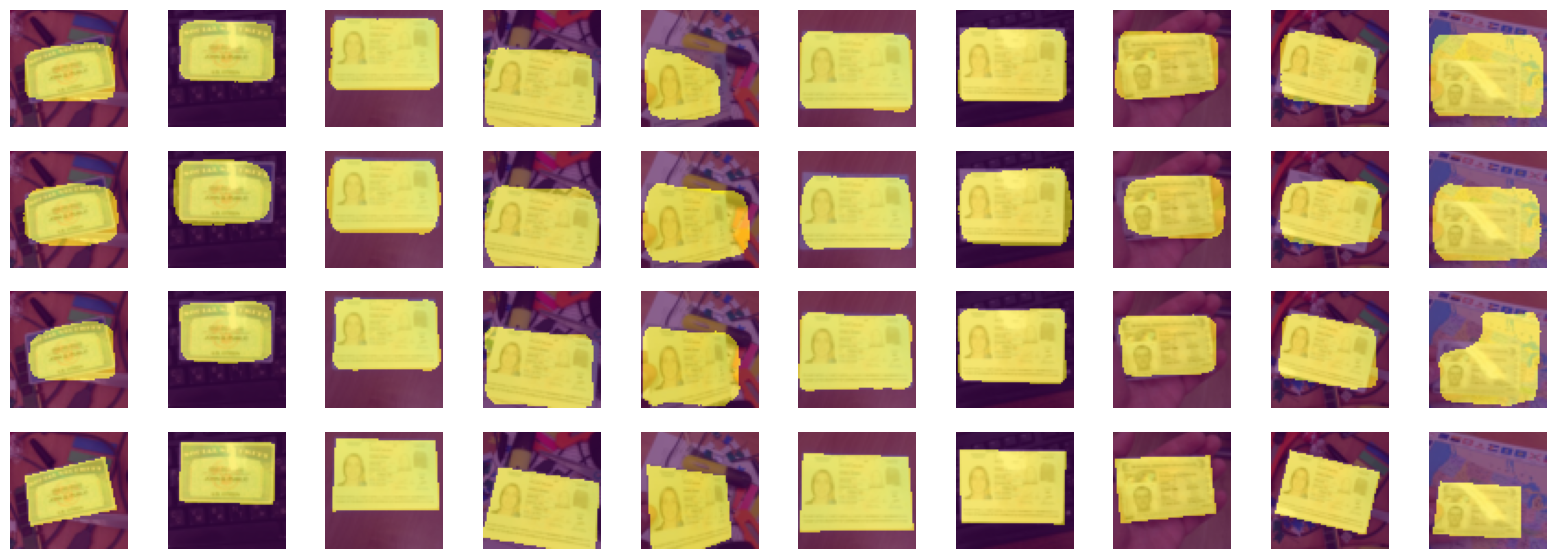

In [4]:
import matplotlib.pyplot as plt

pred_images = numpy.squeeze(numpy.load("1/predictions/images.npy"))
pred_topological = numpy.squeeze(numpy.load("1/predictions/topological.npy"))
pred_combined = numpy.squeeze(numpy.load("1/predictions/combined.npy"))

def show(ax, image, mask):
    ax.axis('off')
    ax.imshow(image)
    ax.imshow((mask > 0.5), vmin = 0, vmax = 1, alpha = 0.6)

fig, axes = plt.subplots(4, 10, figsize = (20, 7))

def show_by_index(ax_idx, index):
    show(axes[0][ax_idx], test_images[index], pred_images[index])
    show(axes[1][ax_idx], test_images[index], pred_topological[index])
    show(axes[2][ax_idx], test_images[index], pred_combined[index])
    show(axes[3][ax_idx], test_images[index], test_masks[index])

numpy.random.seed(1)
to_draw = numpy.random.choice(range(len(test_images)), size = 10)
for ax_idx, index in enumerate(to_draw):
    show_by_index(ax_idx, index)